In [77]:
#from google.colab import drive 
#drive.mount('/content/drive')

In [78]:

# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


#data=pd.read_csv('/content/drive/MyDrive/2012~2021_total_ver0.3.csv')
# data=pd.read_csv('2012_2021_total_ver0.3.csv')

# I read it from my hard drive
data = pd.read_csv ('C:/Users/Igor/Desktop/work/Office/Contracts/appletreelee/2012_2021_total_ver0.3.csv')


 
# data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/sumiao/dataset/2012~2021_total_ver0.3.csv')

df = data 
df = df.reset_index()
df.head()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4070 entries, 0 to 4069
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        4070 non-null   int64  
 1   Date         4070 non-null   float64
 2   Vessel_Size  4070 non-null   int64  
 3   Route        4070 non-null   object 
 4   Distance     4070 non-null   float64
 5   Speed        4070 non-null   float64
 6   Sea_Day      4070 non-null   float64
 7   Port_Day     4070 non-null   float64
 8   Duration     4070 non-null   float64
 9   Bunker_Cost  4070 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 318.1+ KB
None


In [79]:
df.head()

,index,Date,Vessel_Size,Route,Distance,Speed,Sea_Day,Port_Day,Duration,Bunker_Cost
0,0,2012.01,3500,ASCH,1630.0,14.09,4.82,2.62,7.44,98156.66
1,1,2012.01,3500,ASCH,2610.0,7.17,15.17,12.00,27.17,290764.72
2,2,2012.01,4800,IDEU,8545.0,15.60,22.90,7.76,30.66,591629.41
3,3,2012.01,6700,ASNW,9685.0,13.11,30.79,2.45,33.24,727667.61
4,4,2012.01,4800,ASEU,12395.0,14.99,34.46,5.75,40.21,808434.68


In [80]:
df_copy = df.copy()

In [81]:
df['Date'] = df['Date'].astype(str)
year = [int(i.split('.')[0]) for i in df['Date'].values]
month = [int(i.split('.')[1]) for i in df['Date'].values]
df['year'] = year
df['month'] = month
df.head()

,index,Date,Vessel_Size,Route,Distance,Speed,Sea_Day,Port_Day,Duration,Bunker_Cost,year,month
0,0,2012.01,3500,ASCH,1630.0,14.09,4.82,2.62,7.44,98156.66,2012,1
1,1,2012.01,3500,ASCH,2610.0,7.17,15.17,12.00,27.17,290764.72,2012,1
2,2,2012.01,4800,IDEU,8545.0,15.60,22.90,7.76,30.66,591629.41,2012,1
3,3,2012.01,6700,ASNW,9685.0,13.11,30.79,2.45,33.24,727667.61,2012,1
4,4,2012.01,4800,ASEU,12395.0,14.99,34.46,5.75,40.21,808434.68,2012,1


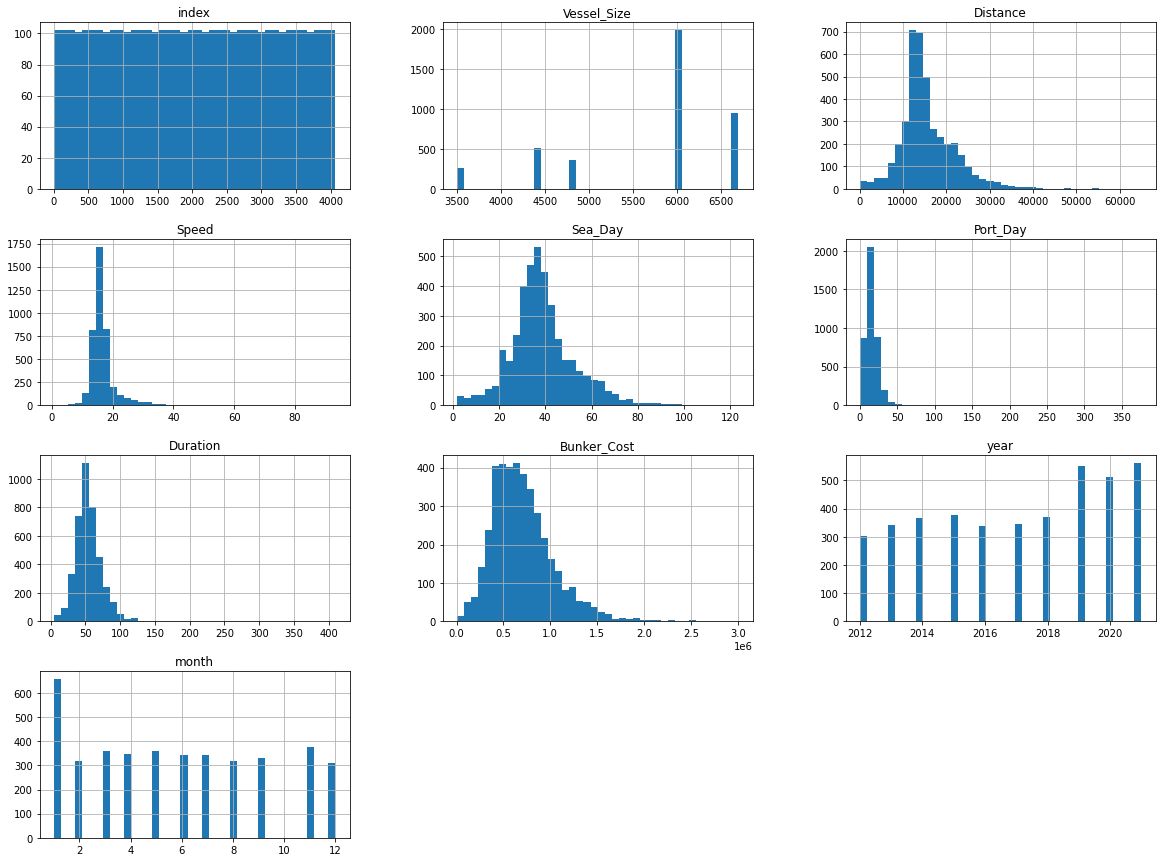

In [82]:
# Overall idea about distribution of data histogram
df.hist(bins=40, figsize=(20,15))
plt.show()

In [83]:
df = df.drop(['index','Date'], axis = 1)
df.head()

,Vessel_Size,Route,Distance,Speed,Sea_Day,Port_Day,Duration,Bunker_Cost,year,month
0,3500,ASCH,1630.0,14.09,4.82,2.62,7.44,98156.66,2012,1
1,3500,ASCH,2610.0,7.17,15.17,12.00,27.17,290764.72,2012,1
2,4800,IDEU,8545.0,15.60,22.90,7.76,30.66,591629.41,2012,1
3,6700,ASNW,9685.0,13.11,30.79,2.45,33.24,727667.61,2012,1
4,4800,ASEU,12395.0,14.99,34.46,5.75,40.21,808434.68,2012,1


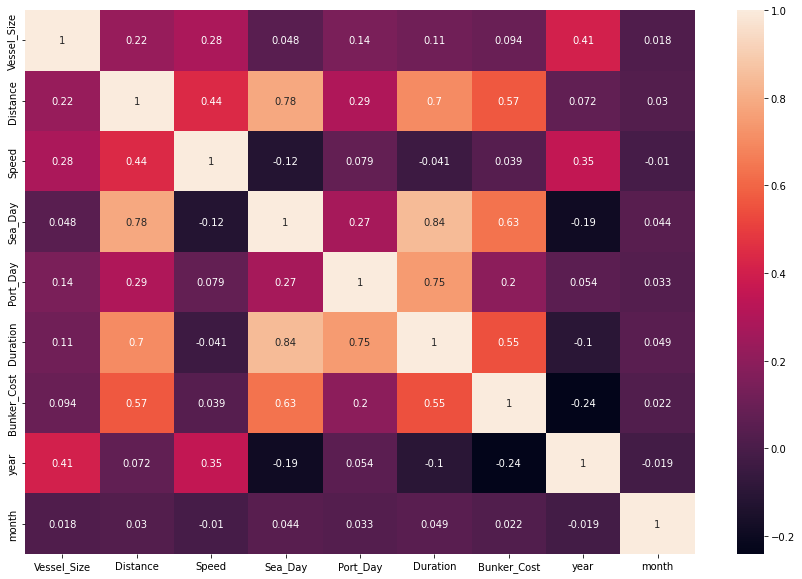

In [84]:
# plot the heatmap of correaltion
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [85]:
# define a function to check correlation of one feature with others features
def check_correlation_with_every_features(feature_name): 
    print(df.corr()[feature_name].sort_values(ascending=False))       

In [86]:
# call the function
check_correlation_with_every_features("Bunker_Cost")

Bunker_Cost    1.000000
Sea_Day        0.632307
Distance       0.565114
Duration       0.545920
Port_Day       0.195266
Vessel_Size    0.093595
Speed          0.038960
month          0.022346
year          -0.241115
Name: Bunker_Cost, dtype: float64


In [87]:
df.columns

Index(['Vessel_Size', 'Route', 'Distance', 'Speed', 'Sea_Day', 'Port_Day',
       'Duration', 'Bunker_Cost', 'year', 'month'],
      dtype='object')

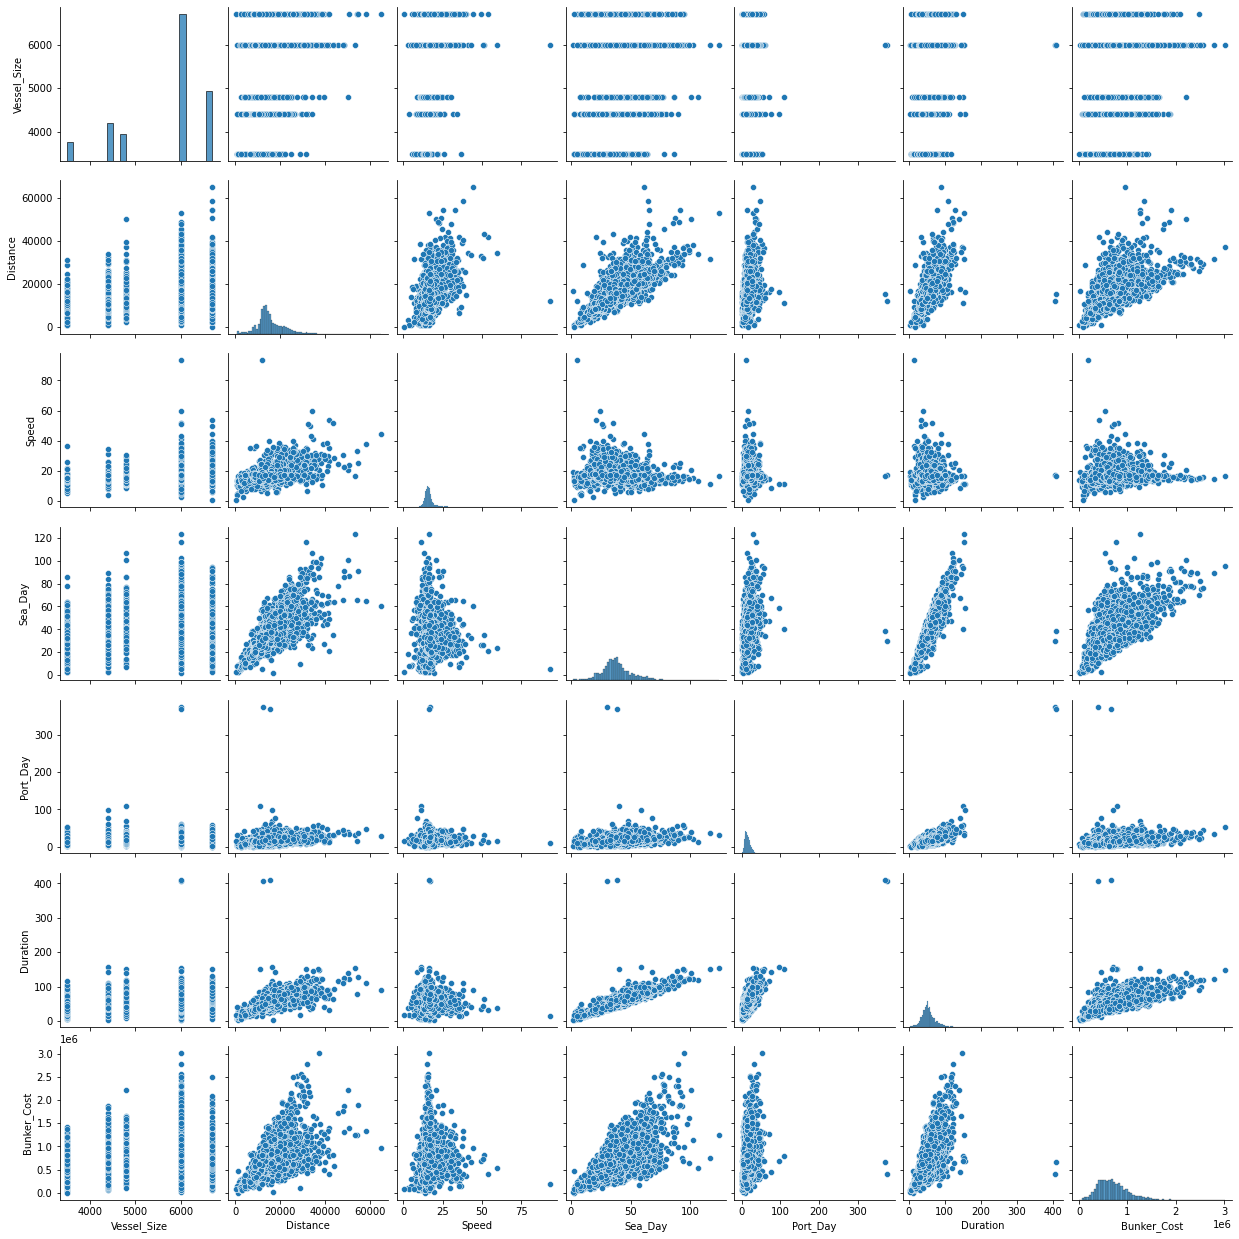

In [88]:
sns.pairplot(df[['Vessel_Size', 'Route', 'Distance', 'Speed', 'Sea_Day',
       'Port_Day', 'Duration', 'Bunker_Cost']])

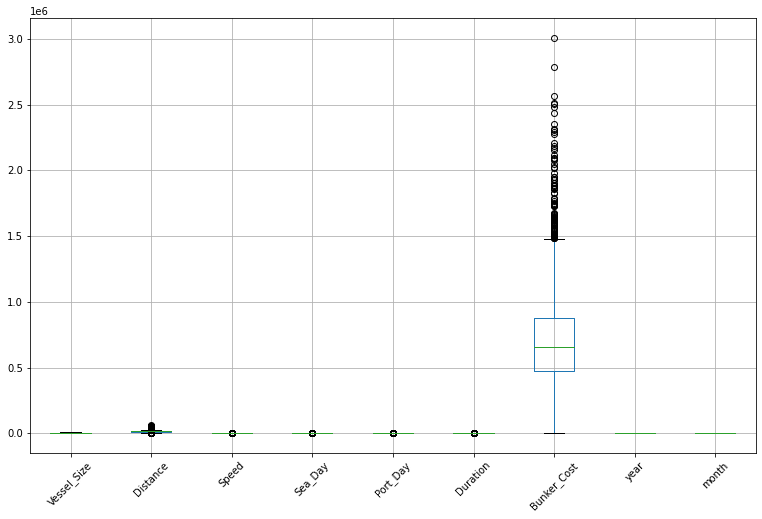

In [89]:
# We apply Boxplot using boxplot() function on the numeric variables as shown below:
plt.figure(figsize=(13,8))
df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [90]:
df_n = df.copy()
df_n1 = df.drop('Route',axis = 1)

# lets try to remove the outliers
for x in df_n1.columns.tolist():
    q75,q25 = np.percentile(df_n1.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_n.loc[df[x] < min,x] = np.nan
    df_n.loc[df[x] > max,x] = np.nan

# lets try to check the sum of count of NULL values/outliers in each column of the dataset
print(df_n.isnull().sum())

Vessel_Size      0
Route            0
Distance       197
Speed          378
Sea_Day        217
Port_Day       103
Duration       129
Bunker_Cost    113
year             0
month            0
dtype: int64


In [91]:
df_n = df_n[~(df_n['Bunker_Cost'].isna())]

In [92]:
# df = df_n.dropna(axis = 0)
df1 = df_n.fillna(df_n.mean())

# print(df1.isnull().sum())
# print()
# print("Shape :",df1.shape)

In [93]:
df['Speed'].value_counts()

14.95    17
15.90    15
16.48    14
15.13    14
16.21    13
         ..
24.89     1
25.32     1
23.01     1
12.59     1
23.86     1
Name: Speed, Length: 1219, dtype: int64

In [94]:
df.describe()['Speed']

count    4070.000000
mean       16.689735
std         4.264738
min         0.590000
25%        14.560000
50%        15.930000
75%        17.437500
max        93.310000
Name: Speed, dtype: float64

In [95]:
pd.cut(df['Speed'], bins=[0.59,20,40,100]).value_counts()

(0.59, 20.0]     3610
(20.0, 40.0]      450
(40.0, 100.0]       9
Name: Speed, dtype: int64

In [96]:
bin_labels = ['SpeedGroup1','SpeedGroup2','SpeedGroup3']

df['Speed'] = pd.cut(df['Speed'], bins=[0.59,20,40,100], labels=bin_labels)
df['Speed'].value_counts()

SpeedGroup1    3610
SpeedGroup2     450
SpeedGroup3       9
Name: Speed, dtype: int64

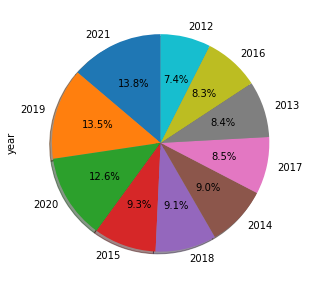

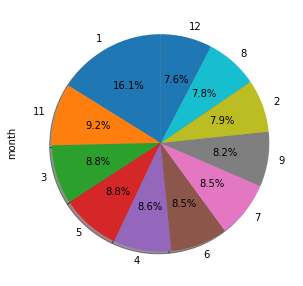

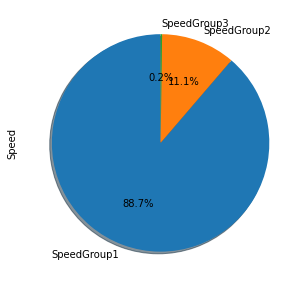

In [97]:
df['year'].value_counts().plot(kind="pie", figsize=(5,5),startangle=90,shadow=True,autopct="%1.1f%%")
plt.show()

df['month'].value_counts().plot(kind="pie", figsize=(5,5),startangle=90,shadow=True,autopct="%1.1f%%")
plt.show()

df['Speed'].value_counts().plot(kind="pie", figsize=(5,5),startangle=90,shadow=True,autopct="%1.1f%%")
plt.show()

In [98]:
df.columns

Index(['Vessel_Size', 'Route', 'Distance', 'Speed', 'Sea_Day', 'Port_Day',
       'Duration', 'Bunker_Cost', 'year', 'month'],
      dtype='object')

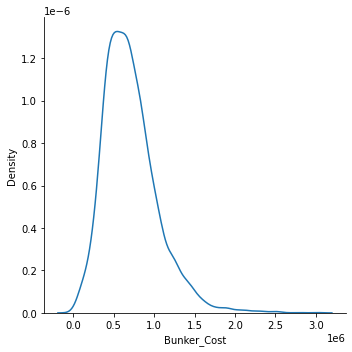

In [99]:
sns.displot(data=df, x='Bunker_Cost', kind='kde')
plt.show()

In [100]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Vessel_Size,4070.0,5697.027027,931.836889,3500.00,4800.0000,6000.000,6000.0000,6700.00
Distance,4070.0,15595.882064,6347.878481,37.00,12032.0000,14252.500,18614.5000,65067.00
Sea_Day,4070.0,38.731899,13.970258,1.65,30.8125,37.305,45.1500,123.58
Port_Day,4070.0,15.828280,11.384082,0.00,10.0200,14.265,19.8200,376.17
Duration,4070.0,54.560182,20.252804,4.33,42.6525,52.070,63.9775,409.76
Bunker_Cost,4070.0,708562.960405,338375.145569,1026.12,471638.5525,658973.600,877481.7550,3007598.65
year,4070.0,2017.045209,2.906577,2012.00,2015.0000,2017.000,2020.0000,2021.00
month,4070.0,5.759214,3.556725,1.00,3.0000,5.000,8.7500,12.00


In [101]:
df = df.dropna()

In [102]:
x = df.drop('Bunker_Cost', axis = 1)
y = df['Bunker_Cost']
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

## Create a pipeline for one hot encoding categorical columns
cat_cols = ['Route', 'Vessel_Size','year','month','Speed']

cat_transformer = Pipeline(steps = [
  ('ohe', OneHotEncoder(handle_unknown='error', 
                        sparse=False,
                        drop='if_binary'))])

## Define pipeline for preprocessing X
preprocessing = ColumnTransformer(transformers=[
    ('cat', cat_transformer, cat_cols)
])
## Preprocess training and test predictors (X)
x_train_route = preprocessing.fit_transform(x_train)
x_test_route = preprocessing.transform(x_test)


In [103]:
## Get the feature names in the order they appear in preprocessed data
feature_names = preprocessing.named_transformers_['cat'].named_steps['ohe'].get_feature_names(cat_cols)
feature_names

array(['Route_AFRI', 'Route_AFRO', 'Route_ASAE', 'Route_ASAG',
       'Route_ASAI', 'Route_ASCA', 'Route_ASCB', 'Route_ASCH',
       'Route_ASEF', 'Route_ASEU', 'Route_ASNE', 'Route_ASNW',
       'Route_ASRD', 'Route_ASSE', 'Route_ASSF', 'Route_ASSW',
       'Route_ASWF', 'Route_ATRO', 'Route_CASW', 'Route_CBAS',
       'Route_CZAS', 'Route_EUAS', 'Route_EUCA', 'Route_EUID',
       'Route_EUME', 'Route_EUNE', 'Route_EUNW', 'Route_IDAG',
       'Route_IDEU', 'Route_NASA', 'Route_NEPG', 'Route_NERO',
       'Route_NWEU', 'Route_POST', 'Route_SFEU', 'Route_WFAS',
       'Route_ZAEU', 'Vessel_Size_3500', 'Vessel_Size_4400',
       'Vessel_Size_4800', 'Vessel_Size_6000', 'Vessel_Size_6700',
       'year_2012', 'year_2013', 'year_2014', 'year_2015', 'year_2016',
       'year_2017', 'year_2018', 'year_2019', 'year_2020', 'year_2021',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_11', 'month_12',
       'Speed_SpeedGroup

In [104]:
x_train_route = pd.DataFrame(x_train_route, columns=feature_names.tolist())
x_test_route = pd.DataFrame(x_test_route, columns=feature_names.tolist())
x_train_route.head()

,Route_AFRI,Route_AFRO,Route_ASAE,Route_ASAG,Route_ASAI,Route_ASCA,Route_ASCB,Route_ASCH,Route_ASEF,Route_ASEU,...,month_5,month_6,month_7,month_8,month_9,month_11,month_12,Speed_SpeedGroup1,Speed_SpeedGroup2,Speed_SpeedGroup3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [105]:
x_train = x_train.drop(['Route','Vessel_Size','year','month','Speed'], axis=1)
x_test = x_test.drop(['Route','Vessel_Size','year','month','Speed'], axis=1)

In [106]:
x_train

,Distance,Sea_Day,Port_Day,Duration
2877,14226.0,36.84,13.63,50.47
2352,11160.0,34.88,16.23,51.11
1613,22045.0,55.52,23.73,79.25
1582,22290.0,40.17,21.25,61.42
3718,11363.0,25.89,12.07,37.96
...,...,...,...,...
1130,15810.0,40.44,25.79,66.23
1294,22416.0,62.44,18.14,80.58
860,11110.0,31.38,11.16,42.54
3508,6288.0,7.39,9.11,16.50


In [107]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train_std = std.fit_transform(x_train)
x_test_std = std.transform(x_test)

x_train_std = pd.DataFrame(x_train_std, columns=x_train.columns.tolist())
x_test_std = pd.DataFrame(x_test_std, columns=x_train.columns.tolist())
x_test_std.head()

,Distance,Sea_Day,Port_Day,Duration
0,-0.497578,-0.910923,-0.962503,-1.176132
1,-0.294807,-0.549831,-0.578634,-0.708552
2,0.062738,0.109647,0.207463,0.194982
3,0.063364,0.633626,0.026377,0.443125
4,-0.695189,-0.442441,0.402736,-0.063866


In [108]:
x_train_final = pd.concat([x_train_std, x_train_route], axis=1)
x_test_final = pd.concat([x_test_std, x_test_route], axis=1)

In [109]:
x_train_final.head()

,Distance,Sea_Day,Port_Day,Duration,Route_AFRI,Route_AFRO,Route_ASAE,Route_ASAG,Route_ASAI,Route_ASCA,...,month_5,month_6,month_7,month_8,month_9,month_11,month_12,Speed_SpeedGroup1,Speed_SpeedGroup2,Speed_SpeedGroup3
0,-0.221797,-0.134684,-0.191427,-0.202534,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.701130,-0.275950,0.025543,-0.171394,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.000611,1.211661,0.651416,1.197773,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.038914,0.105323,0.444461,0.330244,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.669393,-0.923896,-0.321608,-0.811215,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [110]:
# these are possible new additions

In [76]:
import os

xy_train_final = pd.DataFrame(x_train_final)

xy_train_final['Bunker_Cost'] = y_train

# Split training set into subset for validation
train_p1, train_p2 = train_test_split(xy_train_final, test_size=0.3, random_state=142)

In [35]:
train_p1.describe()['Bunker_Cost']
#train_p1.describe()

count    1.826000e+03
mean     7.059971e+05
std      3.389935e+05
min      1.026120e+03
25%      4.645654e+05
50%      6.592938e+05
75%      8.826717e+05
max      2.565135e+06
Name: Bunker_Cost, dtype: float64

In [36]:
# these are features and labels for xgboost, for training and validation portions of the training data (p1 and p2)
train_features_xgb_p1 = train_p1.loc[:, ~train_p1.columns.isin(['Bunker_Cost'])] 
train_labels_xgb_p1 = train_p1.loc[:, 'Bunker_Cost']

train_features_xgb_p2 = train_p2.loc[:, ~train_p2.columns.isin(['Bunker_Cost'])] 
train_labels_xgb_p2 = train_p2.loc[:, 'Bunker_Cost']

train_labels_xgb_p1.fillna(train_labels_xgb_p1.median(), inplace=True)
train_labels_xgb_p2.fillna(train_labels_xgb_p2.median(), inplace=True)

# remove target variable from x_train
x_train_final_xgb = x_train_final.loc[:, ~x_train_final.columns.isin(['Bunker_Cost'])] 


In [37]:
import xgboost as xgb

import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

space={'max_depth': hp.randint('max_depth', 1, 10),
        'gamma': hp.loguniform ('gamma', np.log(1),np.log(10)),
        'reg_alpha' : hp.loguniform('reg_alpha', np.log(0.1),np.log(100)),
        'learning_rate' : hp.loguniform('learning_rate', np.log(0.001),np.log(0.5)),
        'reg_lambda' : hp.loguniform('reg_lambda', np.log(0.01),np.log(1)),
        'colsample_bytree' : hp.loguniform('colsample_bytree', np.log(0.1),np.log(1)),
        'min_child_weight' : hp.randint('min_child_weight', 12),
        'subsample': hp.loguniform('subsample', np.log(0.2),np.log(1)),
        'n_estimators': hp.randint('n_estimators', 50, 1500),
        'seed': 123
    }

In [39]:
def hyperparameter_tuning(space):
    model=xgb.XGBRegressor(max_depth = space['max_depth'], gamma = space['gamma'], reg_alpha = space['reg_alpha'], 
                           learning_rate = space['learning_rate'], reg_lambda = space['reg_lambda'], 
                           colsample_bytree = space['colsample_bytree'], min_child_weight = space['min_child_weight'], 
                           subsample = space['subsample'], 
                           n_estimators = space['n_estimators'] )
    
    evaluation = [( train_features_xgb_p1, train_labels_xgb_p1), ( train_features_xgb_p2, train_labels_xgb_p2)]
    
    model.fit(train_features_xgb_p1, train_labels_xgb_p1,
            eval_set=evaluation, eval_metric="rmse",
            early_stopping_rounds=10,verbose=False)

    pred = model.predict(train_features_xgb_p2)
    mse = (mean_squared_error( train_labels_xgb_p2, pred))**0.5
    print ("SCORE:", mse)
    #change the metric if you like
    return {'loss':mse, 'status': STATUS_OK, 'model': model}

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

trials = Trials()
best = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=1000,
            trials=trials)
print(best)


SCORE:                                                                                                                 
298642.1007583633                                                                                                      
SCORE:                                                                                                                 
301357.56902165106                                                                                                     
SCORE:                                                                                                                 
309069.8986837261                                                                                                      
SCORE:                                                                                                                 
635198.4526757201                                                                                                      
SCORE:                                  

SCORE:                                                                                                                 
298650.9645132251                                                                                                      
SCORE:                                                                                                                 
298479.5039387398                                                                                                      
SCORE:                                                                                                                 
299015.0336647678                                                                                                      
SCORE:                                                                                                                 
304813.1897520258                                                                                                      
SCORE:                                  

SCORE:                                                                                                                 
299134.6128847598                                                                                                      
SCORE:                                                                                                                 
300757.7574475889                                                                                                      
SCORE:                                                                                                                 
298347.918014281                                                                                                       
SCORE:                                                                                                                 
298765.4343844616                                                                                                      
SCORE:                                  

SCORE:                                                                                                                 
298527.4165534186                                                                                                      
SCORE:                                                                                                                 
300914.637816663                                                                                                       
SCORE:                                                                                                                 
302638.6282406819                                                                                                      
SCORE:                                                                                                                 
299805.2100368136                                                                                                      
SCORE:                                  

SCORE:                                                                                                                 
298529.1374888219                                                                                                      
SCORE:                                                                                                                 
300505.8108838337                                                                                                      
SCORE:                                                                                                                 
299845.2760995156                                                                                                      
SCORE:                                                                                                                 
302501.10528091097                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
298107.9552058683                                                                                                      
SCORE:                                                                                                                 
298400.1183061517                                                                                                      
SCORE:                                                                                                                 
303655.29987825616                                                                                                     
SCORE:                                                                                                                 
299415.83795923594                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
299375.4000910177                                                                                                      
SCORE:                                                                                                                 
299083.30655571027                                                                                                     
SCORE:                                                                                                                 
299056.7521517888                                                                                                      
SCORE:                                                                                                                 
299261.21535222564                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
311243.7503716105                                                                                                      
SCORE:                                                                                                                 
299282.1731583673                                                                                                      
SCORE:                                                                                                                 
303985.70457600435                                                                                                     
SCORE:                                                                                                                 
299105.9131385588                                                                                                      
SCORE:                                  

SCORE:                                                                                                                 
302537.79129705223                                                                                                     
SCORE:                                                                                                                 
298603.2426280441                                                                                                      
SCORE:                                                                                                                 
298773.6437256547                                                                                                      
SCORE:                                                                                                                 
301864.5925708972                                                                                                      
SCORE:                                  

SCORE:                                                                                                                 
297919.72048702167                                                                                                     
SCORE:                                                                                                                 
299594.0451628934                                                                                                      
SCORE:                                                                                                                 
309630.04560054623                                                                                                     
SCORE:                                                                                                                 
298609.39810273884                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
298874.6956266122                                                                                                      
SCORE:                                                                                                                 
301910.9009711121                                                                                                      
SCORE:                                                                                                                 
304489.7538897013                                                                                                      
SCORE:                                                                                                                 
298481.66169512185                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
304627.816234523                                                                                                       
SCORE:                                                                                                                 
311504.8097465212                                                                                                      
SCORE:                                                                                                                 
299511.06986023986                                                                                                     
SCORE:                                                                                                                 
299651.8042132352                                                                                                      
SCORE:                                  

SCORE:                                                                                                                 
300081.85081969254                                                                                                     
SCORE:                                                                                                                 
298831.1530716759                                                                                                      
SCORE:                                                                                                                 
298267.0606243188                                                                                                      
SCORE:                                                                                                                 
298811.23773626337                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
298636.84538814693                                                                                                     
SCORE:                                                                                                                 
299047.6616094986                                                                                                      
SCORE:                                                                                                                 
304012.14065343025                                                                                                     
SCORE:                                                                                                                 
297887.4385623071                                                                                                      
SCORE:                                  

SCORE:                                                                                                                 
298227.3577672671                                                                                                      
SCORE:                                                                                                                 
298732.10153530707                                                                                                     
SCORE:                                                                                                                 
304252.8752955316                                                                                                      
SCORE:                                                                                                                 
299193.58023153                                                                                                        
SCORE:                                  

In [41]:
print("The best hyperparameters are : ","\n")
print(best)

The best hyperparameters are :  

{'colsample_bytree': 0.8487853979061882, 'gamma': 4.927716553916231, 'learning_rate': 0.09421159744647278, 'max_depth': 1, 'min_child_weight': 3, 'n_estimators': 328, 'reg_alpha': 32.28247289029249, 'reg_lambda': 0.04742104122688796, 'subsample': 0.3214844945801412}


In [42]:
#x_test_final.head()
#x_train_final.head()

In [43]:
import scipy
from xgboost import XGBRegressor, DMatrix

xg_reg_best = XGBRegressor(
    objective='reg:squarederror',
    random_state=123,    
    verbosity=1,
    n_jobs=-1,
    **best)

xg_reg_best.fit(x_train_final_xgb, y_train)

preds_best = xg_reg_best.predict(x_test_final)

R2 = (scipy.stats.pearsonr(np.array(y_test), np.array(preds_best))[0])**2
print("R2: %f" % (R2))
rmse = np.sqrt(mean_squared_error(y_test, preds_best))
print("RMSE: %f" % (rmse))
MAE = mean_absolute_error(y_test, preds_best)
print("MAE: %f" % (MAE))

R2: 0.781923
RMSE: 168976.270224
MAE: 122027.624983


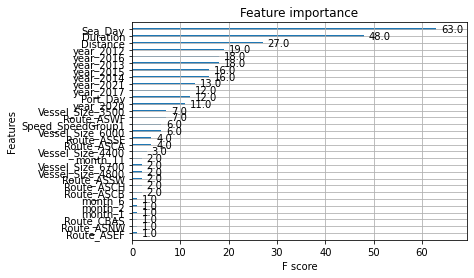

In [44]:
import matplotlib.pyplot as plt
xgb.plot_importance(xg_reg_best)
plt.rcParams['figure.figsize'] = [10, 5]

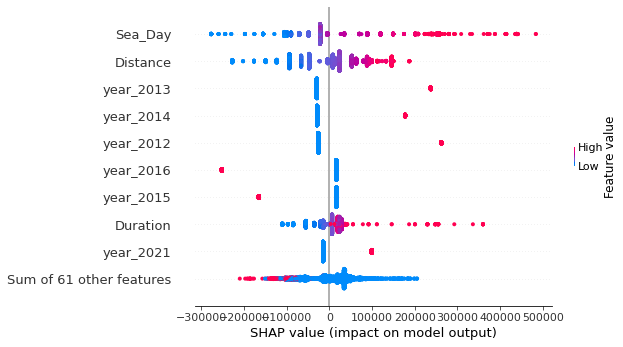

In [45]:
import shap
explainer = shap.Explainer(xg_reg_best, x_train_final_xgb)
shap_values = explainer(x_train_final_xgb)
shap.plots.beeswarm(shap_values, show=False)

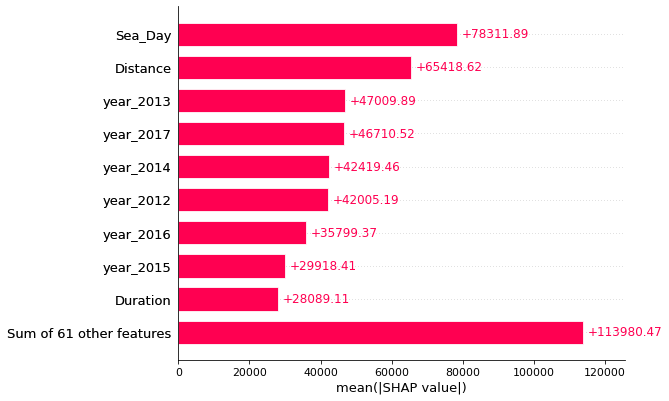

In [46]:
shap.plots.bar(shap_values, show=False)

In [111]:
# import the regressor 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures  
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

!pip install XGBoost
!pip install lightgbm
!pip install catboost

from lightgbm import LGBMRegressor

from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor

# import methods for measuring errors
from sklearn.metrics import mean_squared_error, explained_variance_score, max_error, mean_absolute_error,mean_squared_log_error

Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


In [112]:
# check the performance on diffrent regressor
models = []
models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
models.append(('KNeighborsRegressor', KNeighborsRegressor()))
models.append(('RandomForestRegressor', RandomForestRegressor(n_estimators = 300, random_state = 0)))
models.append(('Linear SVM', SVR()))
models.append(('RBF SVM', SVR(kernel='rbf')))
models.append(('Linear Regression', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('RidgeCV', RidgeCV()))
models.append(('Lasso', Lasso()))
models.append(('LassoCV', LassoCV()))
models.append(('LGBMRegressor', LGBMRegressor()))
models.append(('XGBRegressor', XGBRegressor()))
models.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
models.append(('CatBoostRegressor', CatBoostRegressor()))
models.append(('KernelRidge', KernelRidge()))
models.append(('ElasticNet', ElasticNet()))
models.append(('BayesianRidge', BayesianRidge()))
models.append(('SGDRegressor', SGDRegressor()))
models.append(('Neural Network', MLPRegressor()))








# prepare the cross-validation procedure
cv = KFold(n_splits=5)

results = []
import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(x_train_final, y_train)
    
    # predict values
    predictions = clf.predict(x_test_final)
    # RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    # MAE
    mae = mean_absolute_error(y_test,predictions)
    # MAX errors
    m_errors = max_error(y_test,predictions)
    # R2 score
    r2 = r2_score(y_test,predictions)
    # evaluate model
    scores = cross_val_score(clf, x_test_final, y_test, cv=cv, n_jobs=-1)



    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Root mean squared error (RMSE) : ', rmse)   
    print("-"*50)
    print('Mean absolute error (MAE) : ', mae)
    print("-"*50)
    print('Max errors : ', m_errors)
    print("-"*50)
    print('R2 score : ', r2)
    print("-"*50)
    print('cross validation accuracy : ', np.mean(scores))
    print("-"*50)
    results.append([rmse,mae,r2])


    
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()

+ ==================================================================================================== +
			1-For DecisionTreeRegressor The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  186794.56614046264
--------------------------------------------------
Mean absolute error (MAE) :  132570.52171990174
--------------------------------------------------
Max errors :  1405836.5
--------------------------------------------------
R2 score :  0.7237130291012237
--------------------------------------------------
cross validation accuracy :  0.5580341450402756
--------------------------------------------------
							-----------------------------------------------------------
					 Time for detection (DecisionTreeRegressor) : 3.205 seconds...
							-----------------------------------------------------------

+ ===================================================================

+ ==================================================================================================== +
			10-For LassoCV The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  159719.25855742098
--------------------------------------------------
Mean absolute error (MAE) :  116888.62402199999
--------------------------------------------------
Max errors :  969214.7950100591
--------------------------------------------------
R2 score :  0.7980022653168938
--------------------------------------------------
cross validation accuracy :  0.7866806188804464
--------------------------------------------------
							-----------------------------------------------------------
					 Time for detection (LassoCV) : 0.36 seconds...
							-----------------------------------------------------------

+ =======================================================================================

144:	learn: 129100.4458004	total: 361ms	remaining: 2.13s
145:	learn: 129001.7725424	total: 364ms	remaining: 2.13s
146:	learn: 128893.3939172	total: 366ms	remaining: 2.12s
147:	learn: 128681.6460708	total: 368ms	remaining: 2.12s
148:	learn: 128487.6673729	total: 370ms	remaining: 2.11s
149:	learn: 128311.8533559	total: 372ms	remaining: 2.11s
150:	learn: 128139.2512320	total: 374ms	remaining: 2.1s
151:	learn: 127962.1767725	total: 376ms	remaining: 2.1s
152:	learn: 127841.4798184	total: 378ms	remaining: 2.09s
153:	learn: 127709.2972498	total: 380ms	remaining: 2.08s
154:	learn: 127587.4083689	total: 382ms	remaining: 2.08s
155:	learn: 127456.9920709	total: 384ms	remaining: 2.08s
156:	learn: 127332.6954835	total: 386ms	remaining: 2.07s
157:	learn: 127141.1854693	total: 388ms	remaining: 2.07s
158:	learn: 126977.7774026	total: 390ms	remaining: 2.06s
159:	learn: 126825.3551987	total: 392ms	remaining: 2.06s
160:	learn: 126487.7340363	total: 394ms	remaining: 2.05s
161:	learn: 126416.7619271	total:

347:	learn: 105442.3130024	total: 776ms	remaining: 1.45s
348:	learn: 105387.5998270	total: 779ms	remaining: 1.45s
349:	learn: 105301.0518258	total: 781ms	remaining: 1.45s
350:	learn: 105225.7554125	total: 782ms	remaining: 1.45s
351:	learn: 105182.6288296	total: 785ms	remaining: 1.44s
352:	learn: 105089.5704560	total: 787ms	remaining: 1.44s
353:	learn: 105026.6737673	total: 789ms	remaining: 1.44s
354:	learn: 104971.2187792	total: 791ms	remaining: 1.44s
355:	learn: 104852.2412953	total: 793ms	remaining: 1.43s
356:	learn: 104772.0278910	total: 795ms	remaining: 1.43s
357:	learn: 104736.8019052	total: 797ms	remaining: 1.43s
358:	learn: 104687.1416430	total: 799ms	remaining: 1.43s
359:	learn: 104572.9592438	total: 801ms	remaining: 1.42s
360:	learn: 104523.6096785	total: 803ms	remaining: 1.42s
361:	learn: 104420.4488089	total: 805ms	remaining: 1.42s
362:	learn: 104333.1800907	total: 807ms	remaining: 1.42s
363:	learn: 104255.8967605	total: 810ms	remaining: 1.41s
364:	learn: 104201.6661465	tota

548:	learn: 93748.9744788	total: 1.19s	remaining: 979ms
549:	learn: 93685.7912854	total: 1.19s	remaining: 976ms
550:	learn: 93652.2992287	total: 1.2s	remaining: 974ms
551:	learn: 93628.1901720	total: 1.2s	remaining: 972ms
552:	learn: 93589.8270683	total: 1.2s	remaining: 970ms
553:	learn: 93535.0993052	total: 1.2s	remaining: 967ms
554:	learn: 93508.5372008	total: 1.2s	remaining: 965ms
555:	learn: 93458.4346100	total: 1.21s	remaining: 963ms
556:	learn: 93389.1313236	total: 1.21s	remaining: 960ms
557:	learn: 93349.5347110	total: 1.21s	remaining: 958ms
558:	learn: 93312.3443982	total: 1.21s	remaining: 956ms
559:	learn: 93282.0188487	total: 1.21s	remaining: 954ms
560:	learn: 93263.8542417	total: 1.22s	remaining: 951ms
561:	learn: 93222.0658507	total: 1.22s	remaining: 949ms
562:	learn: 93199.5155803	total: 1.22s	remaining: 947ms
563:	learn: 93168.9502664	total: 1.22s	remaining: 944ms
564:	learn: 93153.3096991	total: 1.22s	remaining: 942ms
565:	learn: 93084.6626026	total: 1.23s	remaining: 940

741:	learn: 85560.3972510	total: 1.59s	remaining: 552ms
742:	learn: 85521.5724459	total: 1.59s	remaining: 550ms
743:	learn: 85497.3470277	total: 1.59s	remaining: 547ms
744:	learn: 85471.1227252	total: 1.59s	remaining: 545ms
745:	learn: 85455.1756460	total: 1.59s	remaining: 543ms
746:	learn: 85414.4193279	total: 1.6s	remaining: 541ms
747:	learn: 85358.4116834	total: 1.6s	remaining: 539ms
748:	learn: 85320.6788007	total: 1.6s	remaining: 537ms
749:	learn: 85280.6398233	total: 1.6s	remaining: 534ms
750:	learn: 85215.6645782	total: 1.6s	remaining: 532ms
751:	learn: 85190.2276047	total: 1.61s	remaining: 530ms
752:	learn: 85165.3476804	total: 1.61s	remaining: 528ms
753:	learn: 85138.7280748	total: 1.61s	remaining: 526ms
754:	learn: 85087.5738995	total: 1.61s	remaining: 523ms
755:	learn: 85060.9034112	total: 1.61s	remaining: 521ms
756:	learn: 85042.7936250	total: 1.62s	remaining: 519ms
757:	learn: 85005.8254655	total: 1.62s	remaining: 517ms
758:	learn: 84975.8011361	total: 1.62s	remaining: 515

929:	learn: 79325.4919118	total: 1.98s	remaining: 149ms
930:	learn: 79290.0477566	total: 1.99s	remaining: 147ms
931:	learn: 79276.0350298	total: 1.99s	remaining: 145ms
932:	learn: 79238.9071340	total: 1.99s	remaining: 143ms
933:	learn: 79211.3216751	total: 1.99s	remaining: 141ms
934:	learn: 79179.4977965	total: 2s	remaining: 139ms
935:	learn: 79151.6720074	total: 2s	remaining: 137ms
936:	learn: 79127.4046990	total: 2s	remaining: 135ms
937:	learn: 79098.7628474	total: 2s	remaining: 132ms
938:	learn: 79075.9459759	total: 2s	remaining: 130ms
939:	learn: 79031.6981782	total: 2.01s	remaining: 128ms
940:	learn: 78997.4714142	total: 2.01s	remaining: 126ms
941:	learn: 78990.5392348	total: 2.01s	remaining: 124ms
942:	learn: 78952.0818567	total: 2.02s	remaining: 122ms
943:	learn: 78908.0061127	total: 2.02s	remaining: 120ms
944:	learn: 78863.4363176	total: 2.02s	remaining: 118ms
945:	learn: 78833.8878088	total: 2.02s	remaining: 115ms
946:	learn: 78786.2361024	total: 2.02s	remaining: 113ms
947:	le

+ ==================================================================================================== +
			19-For Neural Network The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  800575.6567585926
--------------------------------------------------
Mean absolute error (MAE) :  718824.6556672669
--------------------------------------------------
Max errors :  2976711.0623688675
--------------------------------------------------
R2 score :  -4.075007503889085
--------------------------------------------------
cross validation accuracy :  -4.211608236490824
--------------------------------------------------
							-----------------------------------------------------------
					 Time for detection (Neural Network) : 16.998 seconds...
							-----------------------------------------------------------



In [113]:
models[0][0]

'DecisionTreeRegressor'

In [114]:
cols = []
for i in range(len(models)):
    cols.append(models[i][0])

In [115]:
df_models = pd.DataFrame(results, columns=['RMSE','MAE','R2_Score'], index=cols)
# displaying the DataFrame
print(tabulate(df_models, headers = 'keys', tablefmt = 'psql'))

+---------------------------+--------+----------+------------+
|                           |   RMSE |      MAE |   R2_Score |
|---------------------------+--------+----------+------------|
| DecisionTreeRegressor     | 186795 | 132571   |  0.723713  |
| KNeighborsRegressor       | 173846 | 123475   |  0.76069   |
| RandomForestRegressor     | 137036 |  97008   |  0.851304  |
| Linear SVM                | 363040 | 262446   | -0.0436149 |
| RBF SVM                   | 363040 | 262446   | -0.0436149 |
| Linear Regression         | 159756 | 117037   |  0.79791   |
| Ridge                     | 159783 | 116963   |  0.797841  |
| RidgeCV                   | 159783 | 116963   |  0.797841  |
| Lasso                     | 159752 | 117032   |  0.79792   |
| LassoCV                   | 159719 | 116889   |  0.798002  |
| LGBMRegressor             | 131651 |  91810.1 |  0.862761  |
| XGBRegressor              | 137827 |  95692.7 |  0.849582  |
| GradientBoostingRegressor | 138192 | 101894   |  0.84

### lets optimize the CatBoostRegressor

# Optimize the Model

In [116]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
# param_grid = {
#             'depth' : [6,8,10,12,14,16],
#             'learning_rate' : [0.001,0.001,0.01, 0.05, 0.1,1],
#             'iterations'    : [30, 50, 100, 150]}

# parameters = {'depth'         : [4,5,6,7,8,9, 10],
#              'learning_rate' : [0.01,0.02,0.03,0.04],
#               'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
#              }

grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03,0.001,0.01,0.1,0.2,0.3],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

# params = {'depth':[3,1,2,6,4,5,7,8,9,10],
#   'iterations':[250,100,500,1000],
#   'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
#   'l2_leaf_reg':[3,1,5,10,100],
#   'border_count':[32,5,10,20,50,100,200],
#   'ctr_border_count':[50,5,10,20,100,200],
#   'thread_count':[4]}

# Create a based model
rf = CatBoostRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = grid, 
                          cv = 3, n_jobs = -1, verbose = 1)

In [117]:
# Fit the grid search to the data
grid_search.fit(x_train_final, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
0:	learn: 315485.8988728	total: 10.1ms	remaining: 2.02s
1:	learn: 300914.8953267	total: 18.7ms	remaining: 1.85s
2:	learn: 284103.5371773	total: 26.9ms	remaining: 1.76s
3:	learn: 268505.4966917	total: 34.9ms	remaining: 1.71s
4:	learn: 254555.7657213	total: 44.3ms	remaining: 1.73s
5:	learn: 244501.5197064	total: 53.5ms	remaining: 1.73s
6:	learn: 233004.5951208	total: 62.5ms	remaining: 1.72s
7:	learn: 223039.7005177	total: 71.3ms	remaining: 1.71s
8:	learn: 214780.7178432	total: 81.1ms	remaining: 1.72s
9:	learn: 206785.4849275	total: 89.7ms	remaining: 1.7s
10:	learn: 200377.2693093	total: 99ms	remaining: 1.7s
11:	learn: 194971.0018469	total: 107ms	remaining: 1.68s
12:	learn: 190195.8304868	total: 116ms	remaining: 1.66s
13:	learn: 186160.2873998	total: 124ms	remaining: 1.64s
14:	learn: 180986.0281183	total: 132ms	remaining: 1.62s
15:	learn: 176147.6405222	total: 140ms	remaining: 1.61s
16:	learn: 172387.7922421	total: 148ms	remai

145:	learn: 97698.9473288	total: 1.05s	remaining: 387ms
146:	learn: 97465.6294595	total: 1.05s	remaining: 380ms
147:	learn: 97277.0841505	total: 1.06s	remaining: 372ms
148:	learn: 96991.5965846	total: 1.07s	remaining: 366ms
149:	learn: 96822.0286921	total: 1.08s	remaining: 360ms
150:	learn: 96637.1554434	total: 1.08s	remaining: 352ms
151:	learn: 96466.1970864	total: 1.09s	remaining: 345ms
152:	learn: 96363.2671597	total: 1.1s	remaining: 337ms
153:	learn: 96149.0569561	total: 1.1s	remaining: 330ms
154:	learn: 96014.9997611	total: 1.11s	remaining: 322ms
155:	learn: 95855.2779630	total: 1.12s	remaining: 315ms
156:	learn: 95716.4127765	total: 1.12s	remaining: 307ms
157:	learn: 95533.3458835	total: 1.13s	remaining: 300ms
158:	learn: 95378.2825270	total: 1.13s	remaining: 292ms
159:	learn: 95149.8685598	total: 1.14s	remaining: 285ms
160:	learn: 95069.2836587	total: 1.14s	remaining: 277ms
161:	learn: 94872.8848686	total: 1.15s	remaining: 270ms
162:	learn: 94648.4805684	total: 1.16s	remaining: 

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000024FDD19B970>,
             n_jobs=-1,
             param_grid={'depth': [2, 4, 6, 8], 'iterations': [100, 150, 200],
                         'l2_leaf_reg': [0.2, 0.5, 1, 3],
                         'learning_rate': [0.03, 0.001, 0.01, 0.1, 0.2, 0.3]},
             verbose=1)

In [118]:
grid_search.best_params_

{'depth': 8, 'iterations': 200, 'l2_leaf_reg': 3, 'learning_rate': 0.1}

In [119]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    rmse = (np.sqrt(mean_squared_error(test_labels, predictions)))
    r2 = r2_score(test_labels, predictions)

    print('Model Performance')
    print('RMSE: {:.2f}'.format(rmse))
    print('R2: {:.2f}'.format(r2))
    return r2
base_model = CatBoostRegressor()
base_model.fit(x_train_final, y_train)
base_accuracy = evaluate(base_model, x_test_final, y_test)

Learning rate set to 0.049336
0:	learn: 324845.1307878	total: 4.68ms	remaining: 4.67s
1:	learn: 317223.0001439	total: 9.45ms	remaining: 4.71s
2:	learn: 309449.7461487	total: 13.6ms	remaining: 4.53s
3:	learn: 303508.0632809	total: 17.7ms	remaining: 4.41s
4:	learn: 296138.0249237	total: 21.5ms	remaining: 4.29s
5:	learn: 289796.2278760	total: 25.2ms	remaining: 4.18s
6:	learn: 284281.6667588	total: 29.3ms	remaining: 4.16s
7:	learn: 278737.7948164	total: 33.1ms	remaining: 4.1s
8:	learn: 272685.8330583	total: 37.1ms	remaining: 4.08s
9:	learn: 267381.2478829	total: 40.8ms	remaining: 4.04s
10:	learn: 262666.0498136	total: 44.9ms	remaining: 4.04s
11:	learn: 257036.3244651	total: 49.1ms	remaining: 4.04s
12:	learn: 252083.3119123	total: 53.5ms	remaining: 4.06s
13:	learn: 248122.1457470	total: 57.7ms	remaining: 4.06s
14:	learn: 243847.6979762	total: 62.4ms	remaining: 4.1s
15:	learn: 238830.6011928	total: 66.7ms	remaining: 4.1s
16:	learn: 234724.6104359	total: 70.8ms	remaining: 4.09s
17:	learn: 230

152:	learn: 127841.4798184	total: 595ms	remaining: 3.29s
153:	learn: 127709.2972498	total: 599ms	remaining: 3.29s
154:	learn: 127587.4083689	total: 603ms	remaining: 3.29s
155:	learn: 127456.9920709	total: 606ms	remaining: 3.28s
156:	learn: 127332.6954835	total: 610ms	remaining: 3.28s
157:	learn: 127141.1854693	total: 614ms	remaining: 3.27s
158:	learn: 126977.7774026	total: 618ms	remaining: 3.27s
159:	learn: 126825.3551987	total: 621ms	remaining: 3.26s
160:	learn: 126487.7340363	total: 625ms	remaining: 3.26s
161:	learn: 126416.7619271	total: 629ms	remaining: 3.25s
162:	learn: 126229.7101030	total: 632ms	remaining: 3.25s
163:	learn: 126023.6844104	total: 636ms	remaining: 3.24s
164:	learn: 125891.1006092	total: 640ms	remaining: 3.24s
165:	learn: 125754.9694636	total: 644ms	remaining: 3.23s
166:	learn: 125551.0499166	total: 647ms	remaining: 3.23s
167:	learn: 125375.7540613	total: 652ms	remaining: 3.23s
168:	learn: 125209.7588768	total: 655ms	remaining: 3.22s
169:	learn: 125010.3139442	tota

313:	learn: 108083.9121675	total: 988ms	remaining: 2.16s
314:	learn: 107970.5046517	total: 990ms	remaining: 2.15s
315:	learn: 107890.1064871	total: 992ms	remaining: 2.15s
316:	learn: 107817.2539956	total: 994ms	remaining: 2.14s
317:	learn: 107761.5852477	total: 996ms	remaining: 2.13s
318:	learn: 107685.7347808	total: 998ms	remaining: 2.13s
319:	learn: 107625.1137167	total: 1000ms	remaining: 2.12s
320:	learn: 107567.9659454	total: 1s	remaining: 2.12s
321:	learn: 107493.5034399	total: 1s	remaining: 2.11s
322:	learn: 107461.6939033	total: 1s	remaining: 2.11s
323:	learn: 107353.2510997	total: 1.01s	remaining: 2.1s
324:	learn: 107274.3532216	total: 1.01s	remaining: 2.1s
325:	learn: 107217.3168320	total: 1.01s	remaining: 2.09s
326:	learn: 107105.4009260	total: 1.01s	remaining: 2.09s
327:	learn: 107059.0811320	total: 1.01s	remaining: 2.08s
328:	learn: 106967.0132609	total: 1.02s	remaining: 2.08s
329:	learn: 106899.1950819	total: 1.02s	remaining: 2.07s
330:	learn: 106832.1921170	total: 1.02s	r

500:	learn: 95994.7041740	total: 1.38s	remaining: 1.38s
501:	learn: 95956.7148515	total: 1.38s	remaining: 1.37s
502:	learn: 95929.0992462	total: 1.39s	remaining: 1.37s
503:	learn: 95871.0362265	total: 1.39s	remaining: 1.37s
504:	learn: 95828.1764003	total: 1.39s	remaining: 1.36s
505:	learn: 95772.3193942	total: 1.39s	remaining: 1.36s
506:	learn: 95746.5195012	total: 1.4s	remaining: 1.36s
507:	learn: 95677.0699242	total: 1.4s	remaining: 1.35s
508:	learn: 95641.5728736	total: 1.4s	remaining: 1.35s
509:	learn: 95583.0897246	total: 1.4s	remaining: 1.35s
510:	learn: 95504.9179205	total: 1.4s	remaining: 1.34s
511:	learn: 95466.5996127	total: 1.41s	remaining: 1.34s
512:	learn: 95408.8134303	total: 1.41s	remaining: 1.34s
513:	learn: 95355.3920646	total: 1.41s	remaining: 1.33s
514:	learn: 95286.5629148	total: 1.41s	remaining: 1.33s
515:	learn: 95224.3711753	total: 1.41s	remaining: 1.32s
516:	learn: 95210.7634900	total: 1.42s	remaining: 1.32s
517:	learn: 95154.8576025	total: 1.42s	remaining: 1.3

672:	learn: 88393.1169269	total: 1.78s	remaining: 863ms
673:	learn: 88366.3182119	total: 1.78s	remaining: 860ms
674:	learn: 88316.2047008	total: 1.78s	remaining: 858ms
675:	learn: 88288.8390091	total: 1.78s	remaining: 855ms
676:	learn: 88267.2025088	total: 1.78s	remaining: 852ms
677:	learn: 88214.0400510	total: 1.79s	remaining: 849ms
678:	learn: 88175.1371575	total: 1.79s	remaining: 846ms
679:	learn: 88148.3864089	total: 1.79s	remaining: 843ms
680:	learn: 88107.0725656	total: 1.79s	remaining: 840ms
681:	learn: 88055.6597829	total: 1.79s	remaining: 837ms
682:	learn: 88012.0409491	total: 1.8s	remaining: 834ms
683:	learn: 87973.9308854	total: 1.8s	remaining: 831ms
684:	learn: 87933.7393891	total: 1.8s	remaining: 828ms
685:	learn: 87906.1273615	total: 1.8s	remaining: 825ms
686:	learn: 87875.2647501	total: 1.8s	remaining: 823ms
687:	learn: 87814.4897891	total: 1.81s	remaining: 820ms
688:	learn: 87766.5696249	total: 1.81s	remaining: 817ms
689:	learn: 87740.4627621	total: 1.81s	remaining: 814

842:	learn: 82206.9164778	total: 2.39s	remaining: 445ms
843:	learn: 82185.4469540	total: 2.39s	remaining: 442ms
844:	learn: 82147.6231803	total: 2.4s	remaining: 440ms
845:	learn: 82116.9366393	total: 2.4s	remaining: 437ms
846:	learn: 82089.5203529	total: 2.4s	remaining: 434ms
847:	learn: 82055.7655048	total: 2.4s	remaining: 431ms
848:	learn: 82009.2288343	total: 2.41s	remaining: 428ms
849:	learn: 81954.6901900	total: 2.41s	remaining: 425ms
850:	learn: 81913.1664440	total: 2.41s	remaining: 422ms
851:	learn: 81889.3150565	total: 2.41s	remaining: 419ms
852:	learn: 81854.8528093	total: 2.42s	remaining: 416ms
853:	learn: 81807.4664875	total: 2.42s	remaining: 414ms
854:	learn: 81761.3880321	total: 2.42s	remaining: 411ms
855:	learn: 81720.6168261	total: 2.42s	remaining: 408ms
856:	learn: 81701.0134925	total: 2.42s	remaining: 405ms
857:	learn: 81674.9422875	total: 2.43s	remaining: 402ms
858:	learn: 81642.0647418	total: 2.43s	remaining: 399ms
859:	learn: 81615.9007696	total: 2.43s	remaining: 39

991:	learn: 77510.4261110	total: 2.79s	remaining: 22.5ms
992:	learn: 77500.4779353	total: 2.79s	remaining: 19.7ms
993:	learn: 77464.0548083	total: 2.79s	remaining: 16.9ms
994:	learn: 77449.0563973	total: 2.8s	remaining: 14.1ms
995:	learn: 77427.4873853	total: 2.8s	remaining: 11.2ms
996:	learn: 77399.8949916	total: 2.8s	remaining: 8.44ms
997:	learn: 77371.8551613	total: 2.81s	remaining: 5.63ms
998:	learn: 77348.7242607	total: 2.81s	remaining: 2.81ms
999:	learn: 77308.3572613	total: 2.81s	remaining: 0us
Model Performance
RMSE: 125056.34
R2: 0.88


In [122]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_test_final, y_test)

Model Performance
RMSE: 126859.08
R2: 0.87


In [123]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of -0.41%.


In [124]:
# now add SHAP values for CatBoost

In [125]:
import catboost
from catboost import *
import shap
shap.initjs()

In [126]:
explainer_CAT = shap.TreeExplainer(best_grid)
shap_values_CAT = explainer_CAT.shap_values(x_train_final)



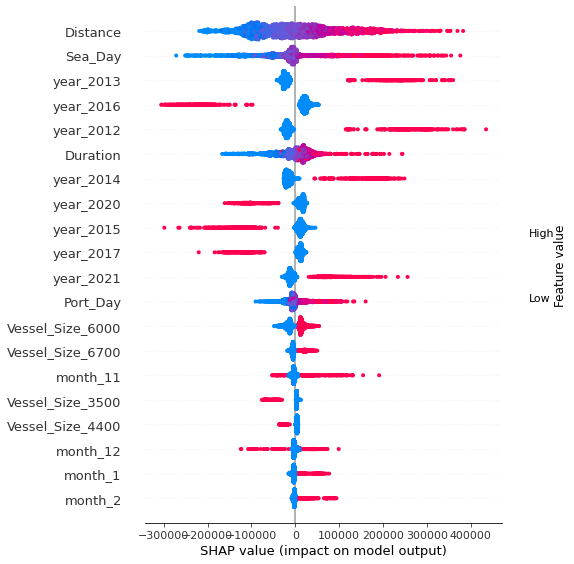

In [127]:
shap.summary_plot(shap_values_CAT, x_train_final)